<a href="https://colab.research.google.com/github/2303A51072/AIML-2025_B16/blob/main/2303A51072__AIML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Feature Importances (Random Forest): [0.10410501 0.04460499 0.41730813 0.43398187]


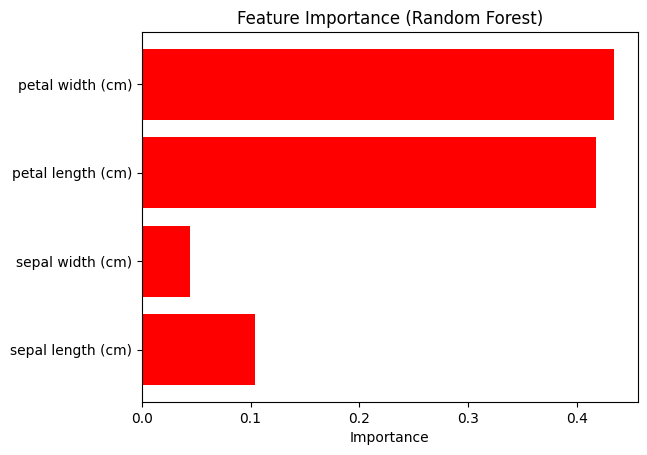

OOB Error: 0.0571


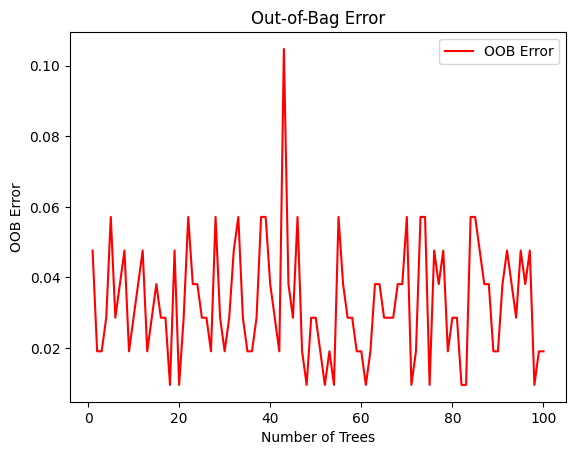

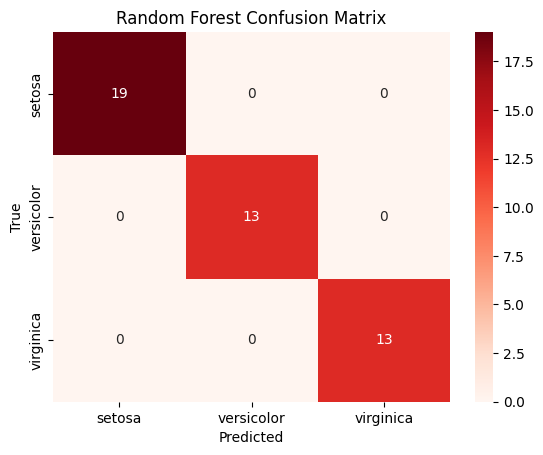

F1-Score (Random Forest): 1.0000
F1-Score (Decision Tree): 1.0000


In [6]:
 # Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Train a Decision Tree classifier (for comparison)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Step 5: Evaluate accuracy of both models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Step 6: Compare feature importances
feature_importances = rf.feature_importances_
print(f"Feature Importances (Random Forest): {feature_importances}")

# Visualize feature importances
plt.barh(data.feature_names, feature_importances, color='red')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

# Step 7: Visualize the out-of-bag (OOB) error for Random Forest
oob_error = 1 - rf.oob_score_
print(f"OOB Error: {oob_error:.4f}")

# Plot OOB error
plt.plot(range(1, 101), [1 - rf.estimators_[i].score(X_train, y_train) for i in range(100)], label="OOB Error", color='red')
plt.title('Out-of-Bag Error')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.legend()
plt.show()

# Step 8: Confusion Matrix and F1-Score
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1-score for Random Forest and Decision Tree
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"F1-Score (Random Forest): {f1_rf:.4f}")
print(f"F1-Score (Decision Tree): {f1_dt:.4f}")
